# MLA - Uebung 1 
Gerald Ebmer, e01325683

## 1.1.1

Index(['x', 'y'], dtype='object')
Index(['x', 'y'], dtype='object')


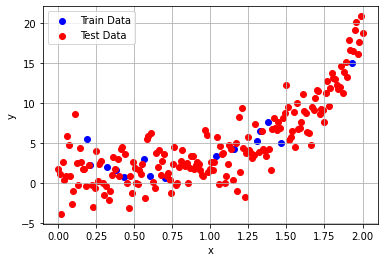

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the data from the CSV files using pandas
train_data = pd.read_csv('regression_train.csv')
test_data = pd.read_csv('regression_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)

# Generate a scatterplot of Ttrain and Ttest
plt.scatter(train_data['x'], train_data['y'], c='blue', label='Train Data')
plt.scatter(test_data['x'], test_data['y'], c='red', label='Test Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()


In [15]:
# number of training samples
n_train = len(train_data)
print('Number of training samples: ', n_train)

# number of test samples
n_test = len(test_data)
print('Number of test samples: ', n_test)

Number of training samples:  3
Number of test samples:  17


## 1.1.2

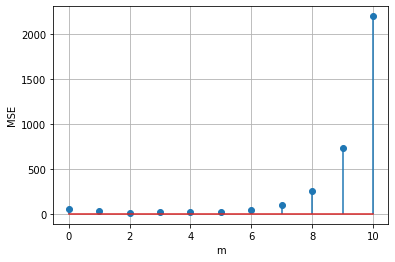

In [18]:
import numpy as np

def solve_ls(x,y,m):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the least squares solution
    p = np.linalg.pinv(S) @ y
    return p

def est_ls(x,m,p):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the mean squared error
    y_est = S @ p
    return y_est

def get_mse(x,y,m,p):
    # Calculate the mean squared error
    y_est = est_ls(x,m,p)
    mse = np.mean((y_est - y)**2)
    return mse

# Calculate the least squares solution for m=1..10
mse_ls = []
for m in range(0,11):
    p = solve_ls(train_data['x'], train_data['y'], m)
    mse = get_mse(test_data['x'], test_data['y'], m, p)
    mse_ls.append(mse)

# stem plot for mse_ls
plt.stem(range(0,11), mse_ls)
plt.xlabel('m')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [16]:
# Index of minimum MSE
m_opt = np.argmin(mse_ls)
print('Optimal degree of polynomial: ', m_opt)

Optimal degree of polynomial:  2


Minimum MSE at m = 2 (-> 3 coefficients) due to number of training samples 3. 

## 1.1.3

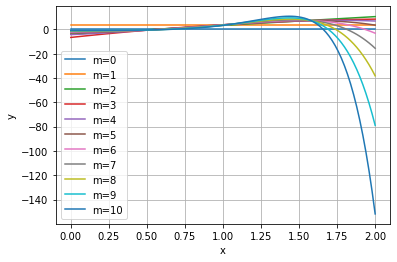

In [19]:
x = np.linspace(0, 2, 100)

for m in range(0,11):
    p = solve_ls(train_data['x'], train_data['y'], m)
    y_est = est_ls(x,m,p)
    mse_ls.append(mse)
    # plot y_est for m=1..10
    plt.plot(x, y_est, label='m='+str(m))
    # hold on

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()



## 1.1.4 Analytical solution for Ridge regression

## 1.1.5 Ridge regression

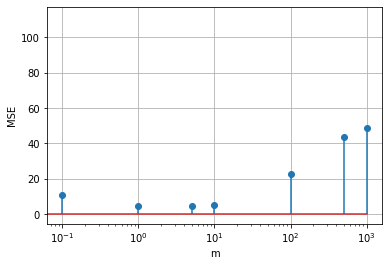

p_ls:  [-2.94675647  2.41336295  3.92035228  2.4486085  -2.10210303]
p_ridge:  [ 4.980609    8.87831207  1.63857404  5.58444698 -3.93390977]
delta y_est:  [0. 0. 0.]


In [25]:
def solve_ridge(x,y,m,l):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the least squares solution
    p = np.linalg.inv(l*np.eye(m) + S.transpose() @ S) @ S.transpose() @ y
    return p

def est_ridge(x,m,p):
    # Generate a Vandermonde matrix of degree m
    S = np.vander(x, m, increasing=True)
    # Calculate the mean squared error
    y_est = S @ p
    return y_est

def get_mse_ridge(x,y,m,p):
    # Calculate the mean squared error
    y_est = est_ridge(x,m,p)
    mse = np.mean((y_est - y)**2)
    return mse

# Calculate the least squares solution for m=1..10
mse_ridge = []
m = 5
l_ls = [0, 0.1, 1, 5, 10, 100, 500, 1000]
for l in l_ls:
    p = solve_ridge(train_data['x'], train_data['y'], m, l)
    mse = get_mse_ridge(test_data['x'], test_data['y'], m, p)
    mse_ridge.append(mse)

plt.stem(l_ls, mse_ridge)
plt.semilogx()
plt.xlabel('m')
plt.ylabel('MSE')
plt.grid()
plt.show()

# sanity check
m = 5
l = 0
p_ls = solve_ls(train_data['x'], train_data['y'], m)
p_ridge = solve_ridge(train_data['x'], train_data['y'], m, l)
y_ls = est_ls(train_data['x'],m,p)
y_ridge = est_ridge(train_data['x'],m,p)
print('p_ls: ', p_ls)
print('p_ridge: ', p_ridge)
print('delta y_est: ', y_ls - y_ridge)


## 1.1.6 Ridge regression TODO

# Problem 1.2

## 1.2.1 Plot data

Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')
Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')


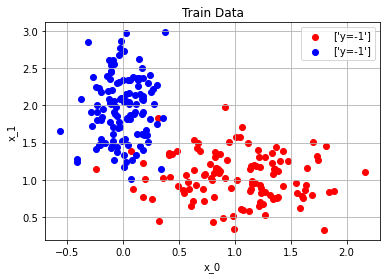

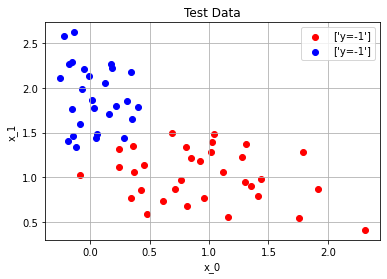

In [8]:
train_data = pd.read_csv('data_blob_train.csv')
test_data = pd.read_csv('data_blob_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)


def separate_data(df, y_value):
    x_0_list = df[df['y'] == y_value]['x_0'].tolist()
    x_1_list = df[df['y'] == y_value]['x_1'].tolist()
    return x_0_list, x_1_list

def scatter_plt(df,  title):
    x_0_list_0, x_1_list_0 = separate_data(df, -1)
    x_0_list_1, x_1_list_1 = separate_data(df, 1)

    plt.scatter(x_0_list_0, x_1_list_0, c='red', label=['y=-1'])
    plt.scatter(x_0_list_1, x_1_list_1, c='blue', label=['y=-1'])
    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()


scatter_plt(train_data, 'Train Data')
scatter_plt(test_data, 'Test Data')

## 1.2.2 Fit classifier

[-0.93029161  0.67039489 -0.52925971]
Accuracy of training data:  0.9791666666666666
Accuracy of test data:  0.95


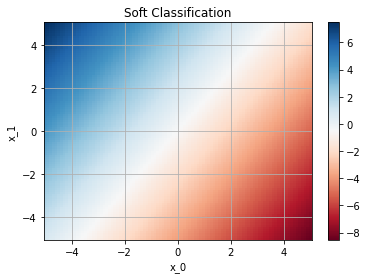

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix

S = np.ones((len(train_data), 3))
S[:, 0] = train_data['x_0']
S[:, 1] = train_data['x_1']
y = train_data['y']

# solve LS 
p = np.linalg.pinv(S) @ y
print(p)

# plot the decision boundary
x_0 = np.linspace(-5, 5, 100)
x_1 = np.linspace(-5, 5, 100)
X_0, X_1 = np.meshgrid(x_0, x_1)

def threshold_softclass(y_soft):
    y_hard = np.zeros(len(y_soft))
    y_hard[y_soft > 0] = 1
    y_hard[y_soft < 0] = -1
    return y_hard

# write function to calculate accuracy of estimation
def get_accuracy(x0,x1,y,p):
    S = np.ones((len(x0), 3))
    S[:, 0] = x0
    S[:, 1] = x1
    y_est = S @ p
    y_est = threshold_softclass(y_est)
    confusion = confusion_matrix(y, y_est)
    accuracy = (confusion[0,0] + confusion[1,1]) / len(y)
    return accuracy

# accuracy of training data
err_train = get_accuracy(train_data['x_0'], train_data['x_1'], train_data['y'],p)
print('Accuracy of training data: ', err_train)

# accuracy of test data
err_test = get_accuracy(test_data['x_0'], test_data['x_1'], test_data['y'],p)
print('Accuracy of test data: ', err_test)

# Heat map
x0 = np.linspace(-5, 5, 100)
x1 = np.linspace(-5, 5, 100)
X0, X1 = np.meshgrid(x0, x1)
S = np.ones((len(X0.flatten()), 3))
S[:, 0] = X0.flatten()
S[:, 1] = X1.flatten()
y_soft = S @ p
Y_soft = y_soft.reshape(X0.shape)
plt.pcolormesh(X0, X1, Y_soft, cmap='RdBu')
plt.colorbar()
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.grid()
plt.title('Soft Classification')
plt.show()


## 1.2.3 Decision Surface

$ y_\text{est} = w_0 x_0 + w_1 x_1 + w_2 $
--> line separating $y = +1$, $y = -1$ --> $ y_\text{est} = 0 $

$ x_1 = (-w_0 x_0 - w_2) / w_1 $

Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')
Index(['Unnamed: 0', 'x_0', 'x_1', 'y'], dtype='object')


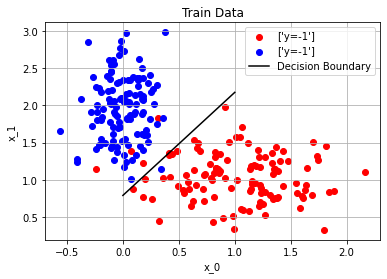

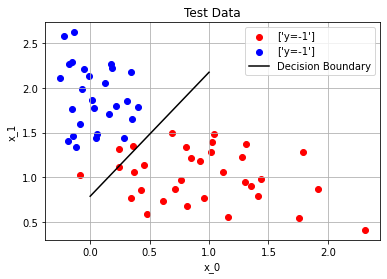

In [22]:
train_data = pd.read_csv('data_blob_train.csv')
test_data = pd.read_csv('data_blob_test.csv')

# show columns of train_data
print(train_data.columns)
print(test_data.columns)


def separate_data(df, y_value):
    x_0_list = df[df['y'] == y_value]['x_0'].tolist()
    x_1_list = df[df['y'] == y_value]['x_1'].tolist()
    return x_0_list, x_1_list

def scatter_plt(df,  title, p):
    x_0_list_0, x_1_list_0 = separate_data(df, -1)
    x_0_list_1, x_1_list_1 = separate_data(df, 1)

    # plot the decision boundary
    x_0 = np.linspace(0, 1, 100)
    x_1 = -(p[2] + p[0]*x_0) / p[1]


    plt.scatter(x_0_list_0, x_1_list_0, c='red', label=['y=-1'])
    plt.scatter(x_0_list_1, x_1_list_1, c='blue', label=['y=-1'])
    plt.plot(x_0, x_1, c='black', label='Decision Boundary')
    plt.xlabel('x_0')
    plt.ylabel('x_1')
    plt.grid()
    plt.legend()
    plt.title(title)
    plt.show()


scatter_plt(train_data, 'Train Data', p)
scatter_plt(test_data, 'Test Data', p)

## 1.2.4 Try the samples

In [25]:
s1 = np.array([-10,10,1])
s2 = np.array([0,1.5,-1])

S = np.ones((2, 3))
S[0,:2] = s1[:2]
S[1,:2] = s2[:2]
y1 = s1[2]
y2 = s2[2]

y_est = S @ p
print("y true: ", [y1, y2])
print("y_soft: ", y_est) 

print("L2 error y_soft1:" , np.linalg.norm(y_est[0] - y1))
print("L2 error y_soft2:" , np.linalg.norm(y_est[1] - y2))

y_est = threshold_softclass(y_est)
print("y_hard: ", y_est) 

print("L2 error y_hard1:" , np.linalg.norm(y_est[0] - y1))
print("L2 error y_hard2:" , np.linalg.norm(y_est[1] - y2))

y true:  [1, -1.0]
y_soft:  [15.4776053   0.47633263]
L2 error y_soft1: 14.47760529714548
L2 error y_soft2: 1.4763326325127841
y_hard:  [1. 1.]
L2 error y_hard1: 0.0
L2 error y_hard2: 2.0


Due to the nonlinear thresholding of the hard classifier the L2 error of the soft classifier is high in the first example although the thesholded estimation is correct. 
Hence, for binary classifiers the usage of the continuous soft classifier is problematic.

## 1.2.5 Moon Dataset

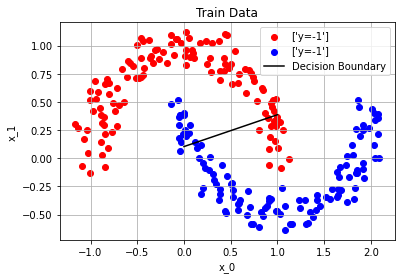

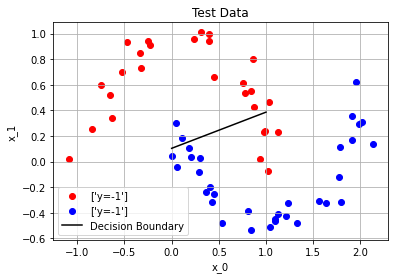

In [27]:
train_data = pd.read_csv('data_moon_train.csv')
test_data = pd.read_csv('data_moon_test.csv')

S = np.ones((len(train_data), 3))
S[:, 0] = train_data['x_0']
S[:, 1] = train_data['x_1']
y = train_data['y']

# solve LS 
p = np.linalg.pinv(S) @ y

scatter_plt(train_data, 'Train Data', p)
scatter_plt(test_data, 'Test Data', p)

A linear classifier is a particular bad choice for this dataset, as can be seen above.